In [2]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/samples.ipynb")

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Comparing CGC to our cancer gene set

In [3]:
cgc = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/references/CGC.csv')
cgc_genes = list(cgc['Gene Symbol'])

In [5]:
haplo_genes = [x.strip() for x in open('/cellar/users/ramarty/Data/hla/git_data/data/tumor_suppressor_genes.txt').readlines()] \
               + [x.strip() for x in open('/cellar/users/ramarty/Data/hla/git_data/data/onco_genes.txt').readlines()]

In [6]:
current_mutations = list(pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.TCGA.inclusive.mut.csv',
                                index_col=0).columns)

In [7]:
# Fraction of our genes in cgc
len([x for x in haplo_genes if x in cgc_genes])/float(len(haplo_genes))

0.5495049504950495

In [8]:
# Fraction of cgc genes in our genes
len([x for x in cgc_genes if x in haplo_genes])/float(len(cgc_genes))

0.15438108484005564

In [9]:
mutation_genes = [x.split('_')[0] for x in current_mutations]

In [10]:
# Fraction of our mutations in their set
len([x for x in mutation_genes if x in cgc_genes])/float(len(mutation_genes))

0.7946954813359528

In [11]:
len([x for x in mutation_genes if x in cgc_genes])

809

In [12]:
df_missense = pd.read_csv('/cellar/users/ramarty/Data/hla/mutations/processed_mutation_files.full_tcga.all_valid_muts.csv',
                          index_col=0)

In [14]:
cgc_df = df_missense[df_missense['Hugo_Symbol'].isin(cgc_genes)&(~df_missense['Hugo_Symbol'].isin(haplo_genes))]

In [15]:
len(cgc_df['combined'].value_counts()[cgc_df['combined'].value_counts() > 2])

1118

In [11]:
cgc_new = list(cgc_df['combined'].value_counts()[cgc_df['combined'].value_counts() > 2].index)

In [12]:
with open('/cellar/users/ramarty/Data/hla_ii/presentation/residues/cgc_new.test.txt', 'w') as f:
    for mutation in cgc_new:
        f.write('{0}\n'.format(mutation))

<matplotlib_venn._common.VennDiagram instance at 0x7f21d15a7f38>

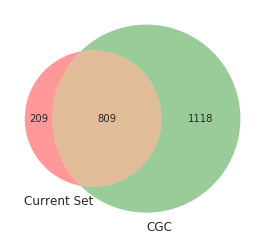

In [23]:
from matplotlib_venn import venn2
venn2(subsets = (len(mutation_genes) - len([x for x in mutation_genes if x in cgc_genes]),
                 1118 ,
                 len([x for x in mutation_genes if x in cgc_genes])), set_labels = ('Current Set', 'CGC'))

In [23]:
len(df_missense[df_missense['Hugo_Symbol'].isin(haplo_genes)]['combined'].value_counts()[df_missense[df_missense['Hugo_Symbol'].isin(haplo_genes)]['combined'].value_counts() > 10])

144

In [22]:
len(cgc_df['combined'].value_counts()[cgc_df['combined'].value_counts() > 10])

21